<a href="https://colab.research.google.com/github/adampalkowski/machinelearning/blob/main/Regresja_logistyczna.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import csv
import math
import numpy as np
from matplotlib import pyplot as plt

def gradient(X, y, theta, alpha, eps):
    """
    :param X: ndarray postaci (n+1, m).
    :param y: ndarray z wartościami referencyjnymi o wymiarze (1, m)
    :param theta: macierz parametrów do optymalizacji postaci (n+1, 1)
    :param alpha: learning rate
    :param eps: epsilon - akceptowalna różnica dla kolejnych wartości funkcji kosztu
    :return:
    """
    m = y.shape[1]
    while True:
        # Pochodne cząstkowe funkcji kosztu
        h_y_diff = (h_fun(X, theta) - y)
        gradient = h_y_diff @ X.T
        new_theta = theta - alpha * gradient.T / m

        # Obliczenie funkcji kosztu
        new_cost = calculate_cost(X, y, new_theta)
        prev_cost = calculate_cost(X, y, theta)

        # Sprawdzenie warunku zakończenia
        if np.abs(new_cost - prev_cost) < eps:
            break
        else:
            theta = new_theta

    return theta
def multiple_variable(X,y,theta,alpha,eps):
  m=y.shape[1]
  prev=calculate_cost(X,y,theta)
  h_y_diff = (h_fun(X, theta) - y)
  gradient = h_y_diff @ X.T
  theta = theta - alpha * gradient.T / m
  tmp=calculate_cost(X,y,theta)


  while abs(prev-tmp>eps):
    h_y_diff = (h_fun(X, theta) - y)
    gradient = h_y_diff @ X.T
    theta = theta - alpha * gradient.T / m
    prev=tmp
    tmp=calculate_cost(X,y,theta)
  return theta
def h_fun(X, theta):
    z = theta.T @ X
    h = 1.0 / (1.0 + np.exp(-z))
    return h
def calculate_cost(X, y, theta):
    h = h_fun(X, theta)
    y_1 = -y*np.log(h+1e-15)
    y_0 = -(1-y)*np.log(1-h+1e-15)
    return (y_1 + y_0).sum() / X.shape[1]

In [ ]:
X = np.array([[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0],
              [0.3, 0.8, 1.7, 2.4, 2.9, 3.1, 4.5, 6.1]])
y = np.array([[0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 1.0, 1.0]])

# `**Zadanie 1**`

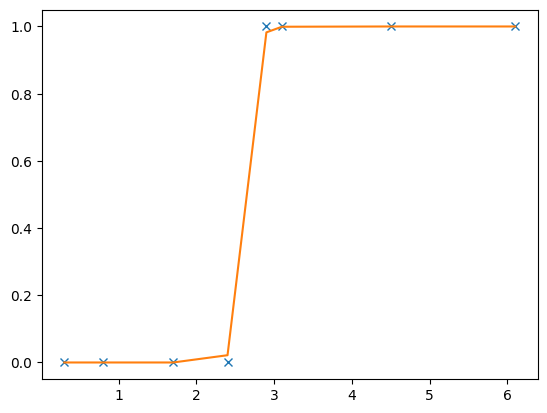

In [ ]:
theta = np.array([[0], [0]])
eps = 1e-8
alpha = 0.05
theta_init= np.array([[0], [0]])
theta=multiple_variable(X,y,theta_init,eps,alpha)
plt.plot(X[1],y[0],'x')
plt.plot(X[1], h_fun(X, theta)[0]);

# `**Zadanie 2**`

In [ ]:
with open("./admission.txt") as f:
    csv_reader = csv.reader(f)
    examples = []
    for row in csv_reader:
        examples.append([float(cell) for cell in row])
    data = np.array(examples)
    y = data[:, 2:3].T
    x = data[:, :2].T
    X = np.concatenate([np.ones([1, x.shape[1]]), x])

print(f'{X.shape=}')
print(f'{y.shape=}')
def plot():
  with open("./admission.txt") as f:
    csv_reader = csv.reader(f)
    examples = []
    for row in csv_reader:
        examples.append([float(cell) for cell in row])
    data = np.array(examples)
    y = data[:, 2:3].T
    x = data[:, :2].T
    X = np.concatenate([np.ones([1, x.shape[1]]), x])

  print(f'{X.shape=}')
  print(f'{y.shape=}')
  for i in range(len(X[0])):
      if y[0][i] == 0:
          plt.plot(X[1][i], X[2][i], "o", color='blue')
      else:
          plt.plot(X[1][i], X[2][i], "x", color='red')

X.shape=(3, 100)
y.shape=(1, 100)


X.shape=(3, 100)
y.shape=(1, 100)


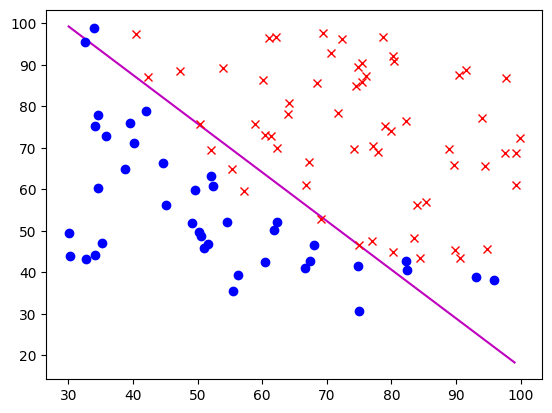

In [ ]:
eps = 1e-6
alpha = 0.005
theta_init= np.array([[0], [0], [0]])
theta=gradient(X,y,theta_init,alpha,eps)
x1_db = np.arange(X[1, :].min(), X[1, :].max(), 1)
x2_db = -theta[0, 0]/theta[2, 0] - theta[1, 0]/theta[2, 0]*x1_db
plt.plot(x1_db, x2_db, '-m')
plot()

# **Zadanie 3**


In [ ]:
with open("./admission.txt") as f:
    csv_reader = csv.reader(f)
    examples = []
    for row in csv_reader:
        examples.append([float(cell) for cell in row])
    data = np.array(examples)
    y = data[:, 2:3].T
    x1 = data[:, :1].T
    x2 = data[:, 1:2].T
    X = np.concatenate([np.ones([1, x1.shape[1]]), x1, x2, x1**2])

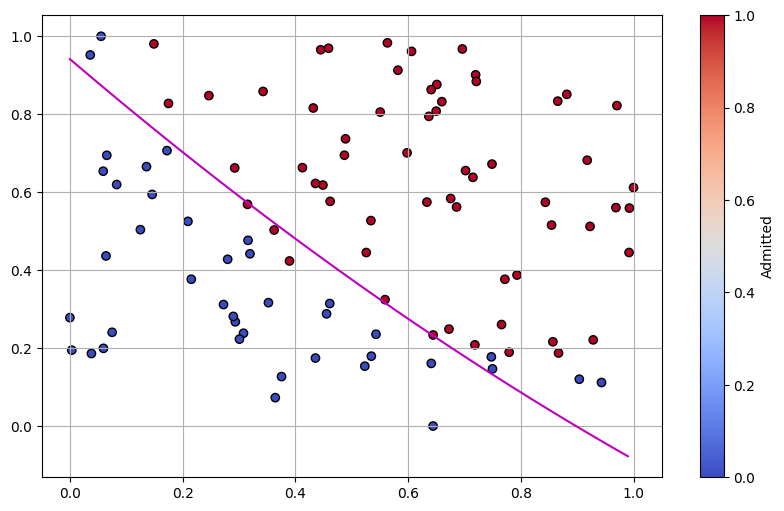

In [ ]:
# Normalizacja danych
X_max = X.max(axis=1)
X_max.shape = [X_max.shape[0], 1]
X_min = X.min(axis=1)
X_min[0] = 0
X_min.shape = [X_min.shape[0], 1]
X = (X - X_min) / (X_max - X_min)

# Inicjalizacja parametrów
eps = 1e-6
alpha = 0.2
theta_init = np.zeros((X.shape[0], 1))

# Optymalizacja wag
theta = gradient(X, y, theta_init, alpha, eps)

#theta0 + theta1 * x1 + theta2 * x2 + theta3 * x1**2 = 0
#x2 = (-theta0 - theta1 * x1 - theta3 * x1**2) / theta2


# Wyznaczenie granicy decyzji
x1_db = np.arange(X[1, :].min(), X[1, :].max(), 0.01)
x2_db = (-theta[0] - theta[1] * x1_db - theta[3] * x1_db**2) / theta[2]

# Wykres
plt.figure(figsize=(10, 6))
plt.scatter(X[1, :], X[2, :], c=y.flatten(), cmap='coolwarm', edgecolors='k')
plt.plot(x1_db, x2_db, '-m')
plt.colorbar(label='Admitted')
plt.grid(True)
plt.show()

#**Zadanie 4**

In [ ]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

data = datasets.load_digits()
y = data['target']
x = data['data']

x, x_test, y, y_test = train_test_split(x, y, random_state=1234)


In [ ]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np

data = datasets.load_digits()
y = data['target']
x = data['data']


x, x_test, y, y_test = train_test_split(x, y, random_state=1234)

theta = []  # kontener na wagi kolejnych modeli
x_scale = x.max()
eps = 1e-7
eps2 = 1e-6
no_of_cls = 10
m = len(y)
n = x.shape[1]
alpha = 0.5

# Logistic regression optimization loop for each class
for cls_id in range(no_of_cls):
    print(f'Optymalizacja dla klasy {cls_id}')
    y_cls = (y == cls_id).astype(np.int8)  # Create y matrix for class cls_id
    y_cls.shape = [1, m]
    x_tmp = np.array(x) / x_scale  # Scale data
    X_cls = np.concatenate([np.ones((1, m)), x_tmp.T])  # Create X matrix
    theta_cls = np.zeros((n+1, 1))  # Initialize theta

    # Perform gradient descent
    theta_cls = multiple_variable(X_cls, y_cls, theta_cls, alpha, eps2)

    # Store theta for this class
    theta.append(theta_cls)

    # Calculate and print cost for this class
    current_cost = calculate_cost(X_cls, y_cls, theta_cls)
    print(f'Koszt dla klasy {cls_id}: {current_cost}.')

true_positives = np.zeros(no_of_cls)
false_positives = np.zeros(no_of_cls)
false_negatives = np.zeros(no_of_cls)

conf_matrix = np.zeros((no_of_cls, no_of_cls))
predictions = []

for i, x_example in enumerate(x_test):
    x_example_scaled = x_example / x_scale
    X_example = np.concatenate([[1], x_example_scaled])

    probabs = np.zeros(no_of_cls)
    for cls_id, theta_cls in enumerate(theta):
        x_example_scaled = np.array(x_example) / x_scale
        X_example = np.array([1, *x_example_scaled])
        X_example = X_example[..., np.newaxis]
        probabs[cls_id] = 1.0 / (1.0 + np.exp(-theta_cls.T @ X_example))

    prediction = np.argmax(probabs)

    if prediction == y_test[i]:
        true_positives[prediction] += 1
    else:
        false_positives[prediction] += 1
        false_negatives[y_test[i]] += 1

    conf_matrix[y_test[i], prediction] += 1
    predictions.append(prediction)

sensitivity = true_positives / (true_positives + false_negatives)
precision = true_positives / (true_positives + false_positives)

print("cls | sensitivity  | precision")
for cls_id in range(no_of_cls):
    print(f" {cls_id}  | {sensitivity[cls_id]:.2f} | {precision[cls_id]:.2f}")

print("Confusion Matrix:")
print(conf_matrix)


Optymalizacja dla klasy 0
Koszt dla klasy 0: 0.005411851201973444.
Optymalizacja dla klasy 1
Koszt dla klasy 1: 0.03208489765399069.
Optymalizacja dla klasy 2
Koszt dla klasy 2: 0.00731914472941502.
Optymalizacja dla klasy 3
Koszt dla klasy 3: 0.025623184603638577.
Optymalizacja dla klasy 4
Koszt dla klasy 4: 0.008915218564694113.
Optymalizacja dla klasy 5
Koszt dla klasy 5: 0.01514244809595955.
Optymalizacja dla klasy 6
Koszt dla klasy 6: 0.009076722437323213.
Optymalizacja dla klasy 7
Koszt dla klasy 7: 0.014217213794733488.
Optymalizacja dla klasy 8
Koszt dla klasy 8: 0.0643923045163375.
Optymalizacja dla klasy 9
Koszt dla klasy 9: 0.03481874849195152.
cls | sensitivity  | precision
 0  | 1.00 | 1.00
 1  | 0.98 | 0.94
 2  | 0.98 | 0.98
 3  | 0.98 | 0.98
 4  | 0.96 | 1.00
 5  | 0.98 | 0.98
 6  | 0.96 | 0.96
 7  | 1.00 | 0.93
 8  | 0.91 | 0.91
 9  | 0.93 | 1.00
Confusion Matrix:
[[37.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0. 46.  0.  0.  0.  0.  1.  0.  0.  0.]
 [ 0.  0. 48.  0.  0.

<ipython-input-251-527d7e238cfe>:57: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  probabs[cls_id] = 1.0 / (1.0 + np.exp(-theta_cls.T @ X_example))


#**Zadanie 5**

In [ ]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np

data = datasets.load_digits()
y = data['target']
x = data['data']

# Obliczanie średniej jasności każdego obrazu
average_brightness = np.mean(x, axis=1)

# Dodawanie średniej jasności jako nowej cechy
x_with_brightness = np.column_stack((x, average_brightness))

x, x_test, y, y_test = train_test_split(x_with_brightness, y, random_state=1234)

theta = []  # kontener na wagi kolejnych modeli
x_scale = x.max()
eps = 1e-7
eps2 = 1e-6
no_of_cls = 10
m = len(y)
n = x.shape[1]
alpha = 0.5

# Logistic regression optimization loop for each class
for cls_id in range(no_of_cls):
    print(f'Optymalizacja dla klasy {cls_id}')
    y_cls = (y == cls_id).astype(np.int8)  # Create y matrix for class cls_id
    y_cls.shape = [1, m]
    x_tmp = np.array(x) / x_scale  # Scale data
    X_cls = np.concatenate([np.ones((1, m)), x_tmp.T])  # Create X matrix
    theta_cls = np.zeros((n+1, 1))  # Initialize theta

    # Perform gradient descent
    theta_cls = multiple_variable(X_cls, y_cls, theta_cls, alpha, eps2)

    # Store theta for this class
    theta.append(theta_cls)

    # Calculate and print cost for this class
    current_cost = calculate_cost(X_cls, y_cls, theta_cls)
    print(f'Koszt dla klasy {cls_id}: {current_cost}.')

true_positives = np.zeros(no_of_cls)
false_positives = np.zeros(no_of_cls)
false_negatives = np.zeros(no_of_cls)

conf_matrix = np.zeros((no_of_cls, no_of_cls))
predictions = []

for i, x_example in enumerate(x_test):
    x_example_scaled = x_example / x_scale
    X_example = np.concatenate([[1], x_example_scaled])

    probabs = np.zeros(no_of_cls)
    for cls_id, theta_cls in enumerate(theta):
        x_example_scaled = np.array(x_example) / x_scale
        X_example = np.array([1, *x_example_scaled])
        X_example = X_example[..., np.newaxis]
        probabs[cls_id] = 1.0 / (1.0 + np.exp(-theta_cls.T @ X_example))

    prediction = np.argmax(probabs)

    if prediction == y_test[i]:
        true_positives[prediction] += 1
    else:
        false_positives[prediction] += 1
        false_negatives[y_test[i]] += 1

    conf_matrix[y_test[i], prediction] += 1
    predictions.append(prediction)

sensitivity = true_positives / (true_positives + false_negatives)
precision = true_positives / (true_positives + false_positives)

print("cls | sensitivity  | precision")
for cls_id in range(no_of_cls):
    print(f" {cls_id}  | {sensitivity[cls_id]:.2f} | {precision[cls_id]:.2f}")

print("Confusion Matrix:")
print(conf_matrix)
